**CREATE by : DHIMASS FAUZANN**



In [ ]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip -q rockpaperscissors.zip


In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = 'rockpaperscissors/rps-cv-images'

image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [4]:
from tensorflow.keras.callbacks import LearningRateScheduler
import time
#def scheduler(epoch, lr):
    #if epoch < 10:
        #return lr
    #else:
        #return lr * 0.9

#lr_scheduler = LearningRateScheduler(scheduler)

start_time = time.time()

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=8,
    #callbacks=[lr_scheduler]
)

end_time = time.time()
time_per_epoch = end_time - start_time

print(f"Time per epoch: {time_per_epoch:.2f} detik")


total_time = time_per_epoch * 10  # Assuming 10 epochs
print(f"Estimasi waktu traning total: {total_time / 60:.2f} menit")

Epoch 1/8
41/41 [==============================] - 28s 520ms/step - loss: 2.6140 - accuracy: 0.5039 - val_loss: 40.7816 - val_accuracy: 0.3310
Epoch 2/8
41/41 [==============================] - 22s 536ms/step - loss: 1.0075 - accuracy: 0.7262 - val_loss: 6.3546 - val_accuracy: 0.3970
Epoch 3/8
41/41 [==============================] - 21s 527ms/step - loss: 0.4514 - accuracy: 0.8471 - val_loss: 1.0758 - val_accuracy: 0.5683
Epoch 4/8
41/41 [==============================] - 17s 424ms/step - loss: 0.4041 - accuracy: 0.8775 - val_loss: 0.6090 - val_accuracy: 0.7222
Epoch 5/8
41/41 [==============================] - 21s 514ms/step - loss: 0.3842 - accuracy: 0.8596 - val_loss: 1.0642 - val_accuracy: 0.6644
Epoch 6/8
41/41 [==============================] - 17s 414ms/step - loss: 0.3446 - accuracy: 0.8970 - val_loss: 0.3338 - val_accuracy: 0.8808
Epoch 7/8
41/41 [==============================] - 21s 519ms/step - loss: 0.3727 - accuracy: 0.8775 - val_loss: 0.3036 - val_accuracy: 0.9039
Epoch

In [5]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Akurasi model: {accuracy * 100:.2f}%")

28/28 [==============================] - 8s 283ms/step - loss: 0.2556 - accuracy: 0.9211
Akurasi model: 92.11%


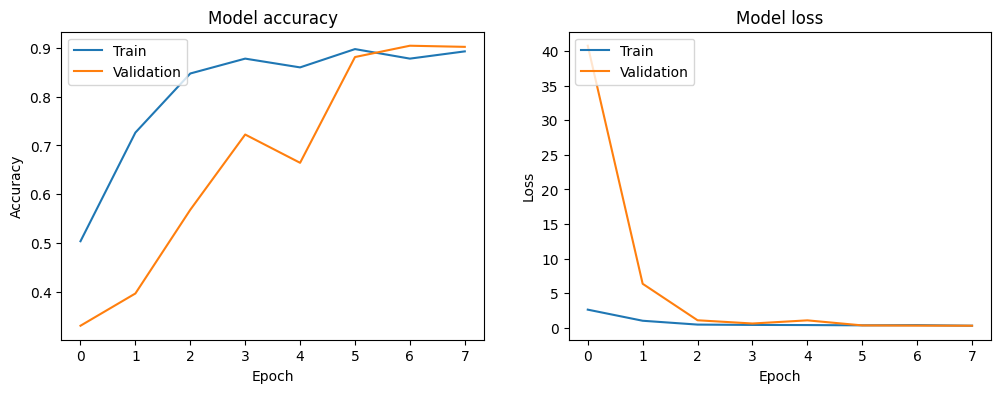

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [7]:
print(train_generator.class_indices)


{'paper': 0, 'rock': 1, 'scissors': 2}


Saving 7L3Xke8iQBzywEPH.png to 7L3Xke8iQBzywEPH.png
1/1 [==============================] - 0s 17ms/step
0
paper


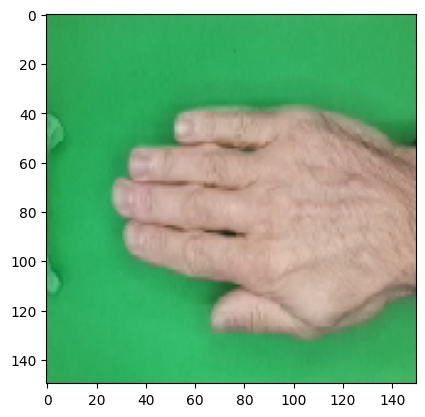

In [32]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  predicted_class = np.argmax(classes, axis=1)[0]

  print(predicted_class)

  if predicted_class == 0:
    print('paper')
  elif predicted_class == 1:
    print('rock')
  elif predicted_class == 2:
    print('scissor')

  img = image.load_img(path, target_size=(150,150))
  plt.imshow(img)
  plt.show()
